In [6]:
import joblib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
# Load the model and scaler together
model_data = joblib.load('naive_bayes_model.pkl')

# Extract the model and scaler
model = model_data['model']
scaler = model_data['scaler']

print("Model and scaler loaded successfully.")


Model and scaler loaded successfully.


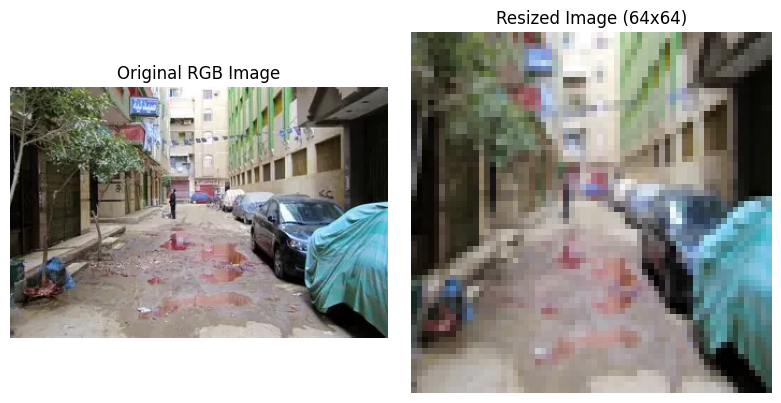

Image preprocessed and scaled correctly. Shape: (1, 12288)


In [22]:
# CHANGE the path to your actual image path
image_path = r"C:\Users\mousa\Downloads\OIP.webp"

# Load the image (RGB)
img_rgb = Image.open(image_path).convert('RGB')

# Resize to match training image size (64x64)
img_resized = img_rgb.resize((64, 64))

# Display the original and resized image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_resized)
plt.title("Resized Image (64x64)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Convert image to numpy array and flatten it (keep RGB format)
img_array = np.array(img_resized).flatten().reshape(1, -1)

# Scale the image using the same scaler
img_scaled = scaler.transform(img_array)

print("Image preprocessed and scaled correctly. Shape:", img_scaled.shape)


Prediction: Bad Street (Class: 1)
Confidence: 100.00%


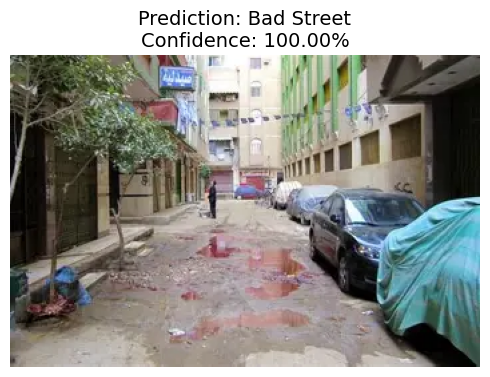

In [23]:
prediction = model.predict(img_scaled)[0]
prob = model.predict_proba(img_scaled)[0]

label_map = {0: "Good Street", 1: "Bad Street"}
label = label_map[prediction]
confidence = max(prob) * 100


print(f"Prediction: {label} (Class: {prediction})")
print(f"Confidence: {confidence:.2f}%")

# --- Visualization ---
plt.figure(figsize=(5, 5))
plt.imshow(img_rgb)
plt.title(f"Prediction: {label}\nConfidence: {confidence:.2f}%", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
import tkinter as tk
from tkinter import filedialog, ttk
from PIL import Image, ImageTk

# --- GUI Function ---
def load_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])
    if file_path:
        # Load and preprocess
        img = Image.open(file_path).convert('RGB')
        img_resized = img.resize((64, 64))
        
        # Predict
        img_array = np.array(img_resized).flatten().reshape(1, -1)
        img_scaled = scaler.transform(img_array)
        prediction = model.predict(img_scaled)[0]
        prob = model.predict_proba(img_scaled)[0]
        label = label_map[prediction]
        confidence = max(prob) * 100

        # Resize for GUI display
        display_img = img.resize((256, 256))
        img_tk = ImageTk.PhotoImage(display_img)
        image_label.config(image=img_tk)
        image_label.image = img_tk  # keep reference

        # Update result label
        result_label.config(
            text=f"Prediction: {label}\nConfidence: {confidence:.2f}%",
            foreground='green' if prediction == 0 else 'red'
        )

# --- Create window ---
window = tk.Tk()
window.title("🛣️ Street Hole Classifier")
window.geometry("400x520")
window.configure(bg="#f5f5f5")
window.resizable(False, False)

# --- Style ---
style = ttk.Style()
style.configure("TLabel", font=("Helvetica", 12), background="#f5f5f5")
style.configure("TButton", font=("Helvetica", 11), padding=6)

# --- Title ---
ttk.Label(window, text="🛠️ Street Hole Image Classifier", font=("Helvetica", 16, "bold")).pack(pady=10)

# --- Load button ---
ttk.Button(window, text="📁 Load Image", command=load_image).pack(pady=10)

# --- Image area ---
image_label = ttk.Label(window)
image_label.pack(pady=10)

# --- Prediction output ---
result_label = ttk.Label(window, text="", font=("Helvetica", 13, "bold"), anchor="center", justify="center")
result_label.pack(pady=10)

# --- Run ---
window.mainloop()
